In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use("fivethirtyeight")

In [2]:
def NevAit(T, c_points, t_points):
    """
    The Neville Aitkens
    Given p + 1 control points c_points and p+1 strictly increasing parameter
    values t_points, computes the polynomial curve of degree p that
    interpolates the control points.
    """
    t = t_points
    c = c_points
    p = len(c_points) - 1
    previous_step = np.array(c)
    for k in range(1, p + 1):
        temp_step = np.zeros((p+1 - k, 2))
        for j in range(0, p - k + 1):
            l_one = (t[j+k] - T) / (t[j+k] - t[j])
            l_two = (T - t[j]) / (t[j+k] - t[j])
            temp_step[j] = l_one*previous_step[j] + l_two * previous_step[j+1]
        previous_step = temp_step
    return previous_step[0]

In [5]:
def demo(n=5): 
    c = [(i, np.random.randint(-10, 10)) for i in range(n)]
    t = range(len(c))

    result = []
    for T in np.linspace(t[0], t[-1], 1000):
        result.append(NevAit(T, c, t_points=t))

    plt.plot(*zip(*result))
    plt.plot(*zip(*c), alpha=0.3, c='grey')
    plt.scatter(*zip(*c), s=100, zorder=10)
    plt.show()

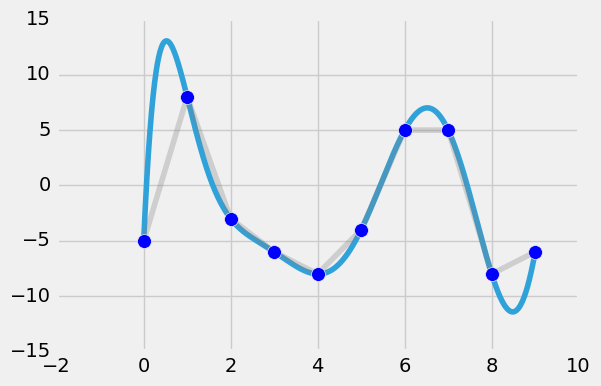

In [6]:
if __name__ == "__main__":
    demo(10)